<a href="https://colab.research.google.com/github/LucasColas/Machine-Learning-Analysis-of-Diabetes/blob/main/Machine_Learning_Analysis_of_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#### Dataset

In [7]:
df = pd.read_csv('diabetes_UCI.csv')
print(df.columns.values)
print('df =', df)
print('df_Info =', df.info())

df = df.reset_index()
df.drop(['index'], axis='columns', inplace=True)

YRdf = pd.DataFrame(df['Outcome'])
YR = np.array(YRdf).ravel()
print('np.unique(YR) =', np.unique(YR))

Xdf = df.copy()
Xdf.drop(['Outcome'], axis='columns', inplace=True)

K = int(np.max(YR))
X = np.array(Xdf)

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']
df =      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        

In [ ]:
Xdf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Visualization

#### Visualization related to pregnancies

(array([246., 178., 125.,  50.,  83.,  52.,  11.,  19.,   3.,   1.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <a list of 10 Patch objects>)

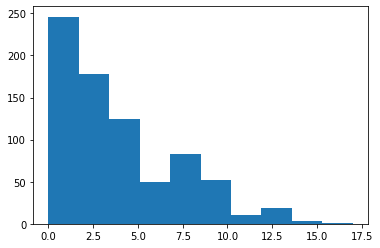

In [ ]:
plt.hist(X[:,0])

([<matplotlib.axis.XTick at 0x7f7203eea850>,
 [Text(0, 0, 'no'), Text(0, 0, 'yes')])

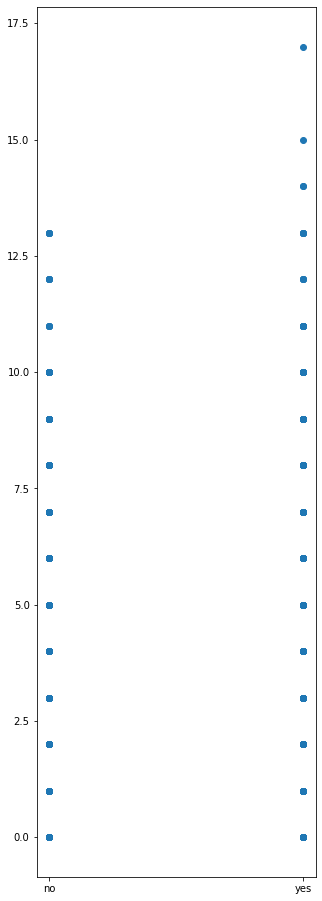

In [ ]:
plt.figure(figsize=(5,16))
plt.scatter(YR, X[:, 0])
x_ticks = [0, 1]

#specify x-axis labels
x_labels = ['no', 'yes'] 

#add x-axis values to plot
plt.xticks(ticks=x_ticks, labels=x_labels)

####Visualization related to Glucose

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

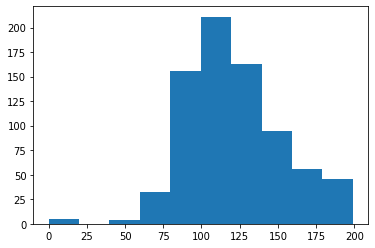

In [ ]:
plt.hist(X[:, 1])

In [ ]:
Glucose_no_d = X[np.where(YR==0), 1]
Glucose_d = X[np.where(YR==1), 1]

In [ ]:
Glucose_no_d = np.reshape(Glucose_no_d, (-1, 1))
Glucose_d = np.reshape(Glucose_d, (-1, 1))

(array([  3.,   0.,   4.,  28., 129., 167.,  99.,  49.,  12.,   9.]),
 array([  0. ,  19.7,  39.4,  59.1,  78.8,  98.5, 118.2, 137.9, 157.6,
        177.3, 197. ]),
 <a list of 10 Patch objects>)

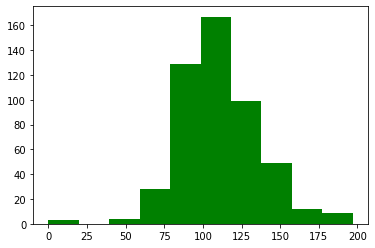

In [ ]:
plt.hist(Glucose_no_d[:, 0], color='green', label='no diabete')


(array([ 2.,  0.,  0.,  1., 13., 54., 63., 51., 45., 39.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

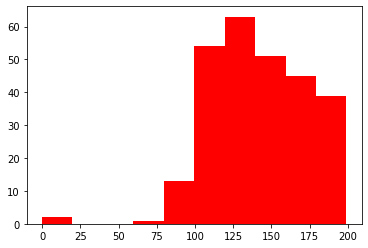

In [ ]:

plt.hist(Glucose_d[:, 0], color='red', label='with diabete')

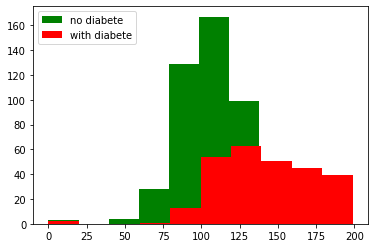

In [ ]:
plt.hist(Glucose_no_d[:, 0], color='green', label='no diabete')
plt.hist(Glucose_d[:, 0], color='red', label='with diabete')
plt.legend(loc='upper left')
plt.show()


## Models

### Logistic Regression

In [ ]:
X.shape[0]

768

In [8]:
test_size = 268/X.shape[0]

X_train, X_test, y_train, y_test = train_test_split(X, YR, test_size=test_size)

In [ ]:
print("X train shape : ", X_train.shape)
print("Y train shape : ", y_train.shape)

print("X test shape : ", X_test.shape)
print("Y test shape : ", y_test.shape)

X train shape :  (500, 8)
Y train shape :  (500,)
X test shape :  (268, 8)
Y test shape :  (268,)


In [ ]:
LR = LogisticRegression(max_iter=1000).fit(X_train, y_train)

In [ ]:
LR.score(X_train, y_train)

0.764

In [ ]:
LR.score(X_test, y_test)

0.7910447761194029

<Figure size 1800x1800 with 0 Axes>

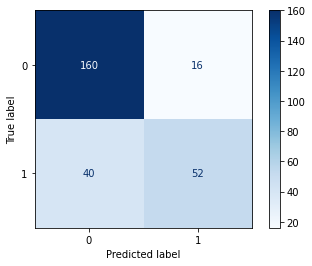

In [ ]:
plt.figure(figsize=(25,25))
disp = ConfusionMatrixDisplay.from_estimator(
        LR,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=None,
    )


plt.show()

#### Prediction

In [ ]:
LR.predict_proba(np.reshape(X_test[1,:], (1, -1)))

array([[0.37364174, 0.62635826]])

In [ ]:
y_test[1]

1

In [ ]:
LR.classes_

array([0, 1])

In [ ]:
LR.predict(np.reshape(X_test[1,:], (1, -1)))

array([1])

In [ ]:
LR.predict(np.reshape(X_test[4,:], (1, -1)))

array([1])

In [9]:
y_test[4]

0

#### cross validation

In [13]:
scores = cross_val_score(LR, X, YR, cv=20)



([], [], [])

In [10]:
LR = LogisticRegression(max_iter=1000)

In [12]:
cv = np.arange(5, 30, 1)
for i in cv:
  scores = cross_val_score(LR, X, YR, cv=i)
  print(f"mean with cv={i} : {np.mean(scores)}")

mean with cv=5 : 0.7721925133689839
mean with cv=6 : 0.7760416666666666
mean with cv=7 : 0.7761229596091982
mean with cv=8 : 0.7721354166666667
mean with cv=9 : 0.7682626538987687
mean with cv=10 : 0.7734791524265209
mean with cv=11 : 0.7734989648033125
mean with cv=12 : 0.7747395833333334
mean with cv=13 : 0.7722729248152977
mean with cv=14 : 0.776046176046176
mean with cv=15 : 0.7760432378079437
mean with cv=16 : 0.76953125
mean with cv=17 : 0.774765558397272
mean with cv=18 : 0.7723022025347608
mean with cv=19 : 0.7762516046213094
mean with cv=20 : 0.7723009446693658
mean with cv=21 : 0.774917774917775
mean with cv=22 : 0.7722307104660046
mean with cv=23 : 0.7722235139114934
mean with cv=24 : 0.7747395833333334
mean with cv=25 : 0.7723870967741935
mean with cv=26 : 0.7723695844385499
mean with cv=27 : 0.7737182995803685
mean with cv=28 : 0.773762282690854
mean with cv=29 : 0.7737007564593772


In [ ]:
LR.coef_.ravel()

array([ 8.36000855e-02,  3.30341520e-02, -7.83471708e-03,  5.62080433e-04,
       -3.86571518e-04,  8.48753685e-02,  8.55652303e-01,  2.01914898e-02])

In [ ]:
alphas = np.arange(10e-6, 10e-3, 10e-6)
res = np.zeros((alphas.shape[0], 8))
acc = np.zeros((alphas.shape[0]))
acc.shape

(999,)

#### Lasso

In [ ]:

lambda_ = 0.01
LR_Lasso = LogisticRegression(penalty='l1', solver='saga', C=lambda_, max_iter=1000)
alphas = np.arange(10e-6, 10e-3, 10e-6)
res = np.zeros((alphas.shape[0], 8))
acc = np.zeros((alphas.shape[0]))
for i,alpha in enumerate(alphas):
  LR_Lasso = LogisticRegression(penalty='l1', solver='saga', C=alpha, max_iter=10000).fit(X_train, y_train)
  acc[i] = LR_Lasso.score(X_train, y_train)
  for j,coeff in enumerate(LR_Lasso.coef_.ravel()):
    res[i,j] = coeff







/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<Figure size 2280x1080 with 0 Axes>

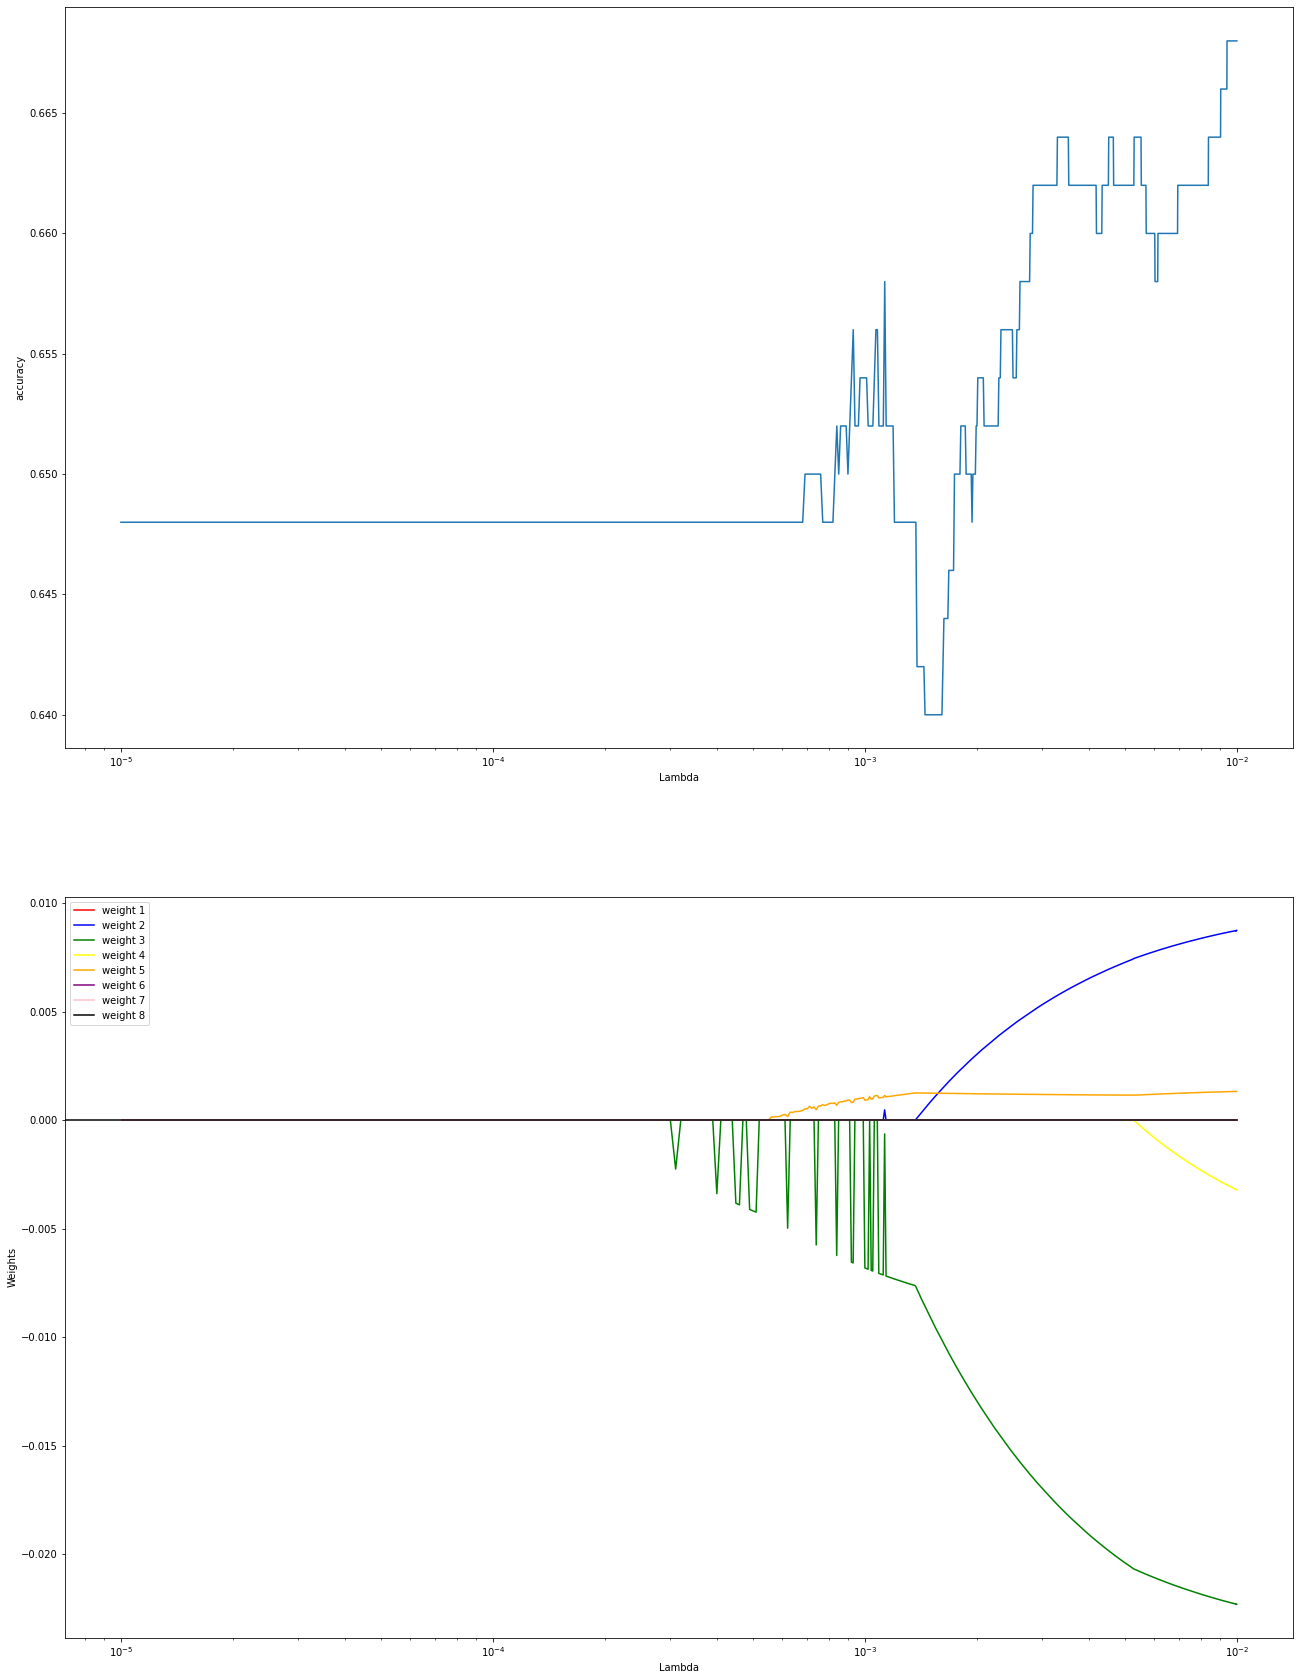

In [ ]:
plt.figure(figsize=(19, 9), dpi=120)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(22, 30))

ax1.plot(alphas, acc.ravel())
ax2.plot(alphas, res[:, 0], color='red', label='weight 1')
ax2.plot(alphas, res[:, 1], color='blue', label='weight 2')
ax2.plot(alphas, res[:, 2], color='green', label='weight 3')
ax2.plot(alphas, res[:, 3], color='yellow', label='weight 4')
ax2.plot(alphas, res[:, 4], color='orange', label='weight 5')
ax2.plot(alphas, res[:, 5], color='purple', label='weight 6')
ax2.plot(alphas, res[:, 6], color='pink', label='weight 7')
ax2.plot(alphas, res[:, 7], color='black', label='weight 8')
ax2.legend()

ax1.set(xlabel='Lambda', ylabel='accuracy')
ax2.set(xlabel='Lambda', ylabel='Weights')
ax2.set_xscale('log')
ax1.set_xscale('log')
ax2.hlines(y=0, xmin=0, xmax=10e-3)

### LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

test_size = 268/X.shape[0]

X_train, X_test, y_train, y_test = train_test_split(X, YR, test_size=test_size)

LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
LDA.score(X_train,y_train)

0.776

In [ ]:
LDA.score(X_test,y_test)

0.7910447761194029

<Figure size 1800x1800 with 0 Axes>

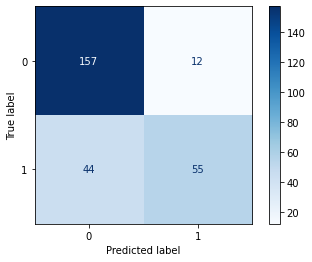

In [ ]:
plt.figure(figsize=(25,25))
disp = ConfusionMatrixDisplay.from_estimator(
        LDA,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=None,
    )


plt.show()

### QDA

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

test_size = 268/X.shape[0]

X_train, X_test, y_train, y_test = train_test_split(X, YR, test_size=test_size)
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [ ]:
QDA.score(X_train, y_train)

0.784

In [ ]:
QDA.score(X_test, y_test)

0.6977611940298507

<Figure size 1800x1800 with 0 Axes>

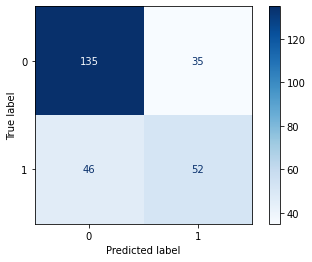

In [ ]:
plt.figure(figsize=(25,25))
disp = ConfusionMatrixDisplay.from_estimator(
        QDA,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=None,
    )


plt.show()

### SVM

In [ ]:
from sklearn import svm
SVM = svm.SVC(kernel='linear')
test_size = 268/X.shape[0]
X_train, X_test, y_train, y_test = train_test_split(X, YR, test_size=test_size)
SVM.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
SVM.score(X_train, y_train)

0.78

In [ ]:
SVM.score(X_test, y_test)

0.7910447761194029

<Figure size 1800x1800 with 0 Axes>

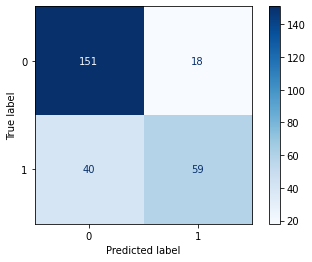

In [ ]:
plt.figure(figsize=(25,25))
disp = ConfusionMatrixDisplay.from_estimator(
        QDA,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=None,
    )


plt.show()

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
test_size = 268/X.shape[0]
X_train, X_test, y_train, y_test = train_test_split(X, YR, test_size=test_size)
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

In [ ]:
GNB.score(X_train, y_train)

0.736

In [ ]:
GNB.score(X_test, y_test)

0.7910447761194029

<Figure size 1800x1800 with 0 Axes>

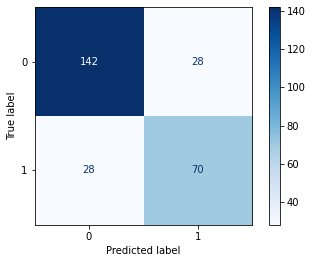

In [ ]:
plt.figure(figsize=(25,25))
disp = ConfusionMatrixDisplay.from_estimator(
        QDA,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=None,
    )


plt.show()

### Decision Tree

In [ ]:
from sklearn import tree

test_size = 268/X.shape[0]
X_train, X_test, y_train, y_test = train_test_split(X, YR, test_size=test_size)

DecisionTree = tree.DecisionTreeClassifier()
DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
DecisionTree.score(X_train, y_train)

1.0

In [ ]:
DecisionTree.score(X_test, y_test)

0.7313432835820896

<Figure size 1800x1800 with 0 Axes>

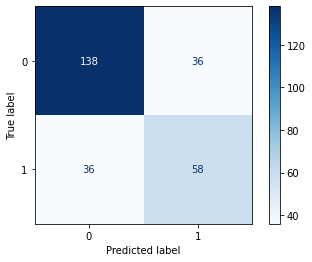

In [ ]:
plt.figure(figsize=(25,25))
disp = ConfusionMatrixDisplay.from_estimator(
        DecisionTree,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=None,
    )


plt.show()

### Comparison